<a href="https://colab.research.google.com/github/ajaythakur3369/Digital-Bhem-Internship/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Fake News Detection**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Digital Bhem**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Digital-Bhem-Internship)**

# **Problem Statement -**

**To build a model that can identify fake news articles with high accuracy, using a variety of algorithms such as support vector machines, naive Bayes classifiers, or deep learning models.**

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

**Read datasets**

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/Digital_Bhem/File_Name/Fake_news_dataset.csv")
true = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/Digital_Bhem/File_Name/Real_news_dataset.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

**Data cleaning and preparation**

In [ ]:
# Adding a flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenating dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffling the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

In [ ]:
# Checking the data
data.head()

,title,text,subject,date,target
0,Ellen Pompeo Just Shut A Racist Twitter Troll...,After Ellen Pompeo viewed yet other shooting o...,News,"July 21, 2016",fake
1,PRICELESS! TRUMP’S ANSWER About Putin Firing U...,This is priceless! President Trump just gave t...,left-news,"Aug 10, 2017",fake
2,Congress finalizes $700 billion defense spendi...,WASHINGTON (Reuters) - Members of U.S. congres...,politicsNews,"November 8, 2017",true
3,Trump Gets TORCHED After Hypocritically Whini...,Donald Trump is throwing a hissy fit because D...,News,"February 8, 2017",fake
4,Trump rivals call for release of NY Times edit...,SAN ANTONIO (Reuters) - Donald Trump’s Republi...,politicsNews,"March 1, 2016",true


In [ ]:
# Removing the date as it won't be used for the analysis
data.drop(["date"], axis = 1, inplace = True)
data.head()

,title,text,subject,target
0,Ellen Pompeo Just Shut A Racist Twitter Troll...,After Ellen Pompeo viewed yet other shooting o...,News,fake
1,PRICELESS! TRUMP’S ANSWER About Putin Firing U...,This is priceless! President Trump just gave t...,left-news,fake
2,Congress finalizes $700 billion defense spendi...,WASHINGTON (Reuters) - Members of U.S. congres...,politicsNews,true
3,Trump Gets TORCHED After Hypocritically Whini...,Donald Trump is throwing a hissy fit because D...,News,fake
4,Trump rivals call for release of NY Times edit...,SAN ANTONIO (Reuters) - Donald Trump’s Republi...,politicsNews,true


In [ ]:
# Removing the title as only the text will be used
data.drop(["title"], axis = 1, inplace = True)
data.head()

,text,subject,target
0,After Ellen Pompeo viewed yet other shooting o...,News,fake
1,This is priceless! President Trump just gave t...,left-news,fake
2,WASHINGTON (Reuters) - Members of U.S. congres...,politicsNews,true
3,Donald Trump is throwing a hissy fit because D...,News,fake
4,SAN ANTONIO (Reuters) - Donald Trump’s Republi...,politicsNews,true


In [ ]:
# Converting to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,after ellen pompeo viewed yet other shooting o...,News,fake
1,this is priceless! president trump just gave t...,left-news,fake
2,washington (reuters) - members of u.s. congres...,politicsNews,true
3,donald trump is throwing a hissy fit because d...,News,fake
4,san antonio (reuters) - donald trump’s republi...,politicsNews,true


In [ ]:
# Removing punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check the top 5 rows of the dataset
data.head()

,text,subject,target
0,after ellen pompeo viewed yet other shooting o...,News,fake
1,this is priceless president trump just gave th...,left-news,fake
2,washington reuters members of us congressiona...,politicsNews,true
3,donald trump is throwing a hissy fit because d...,News,fake
4,san antonio reuters donald trump’s republican...,politicsNews,true


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,ellen pompeo viewed yet shooting unarmed black...,News,fake
1,priceless president trump gave best response e...,left-news,fake
2,washington reuters members us congressional de...,politicsNews,true
3,donald trump throwing hissy fit democrats bloc...,News,fake
4,san antonio reuters donald trump’s republican ...,politicsNews,true



**Basic data exploration**

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


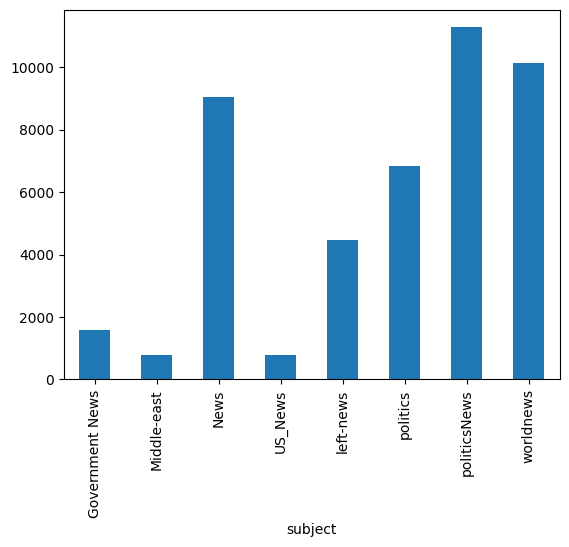

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind = "bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


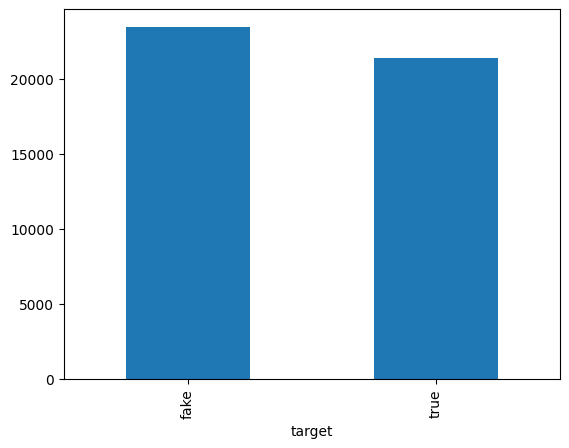

In [ ]:
# How many fake and real articles are there?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind = "bar")
plt.show()

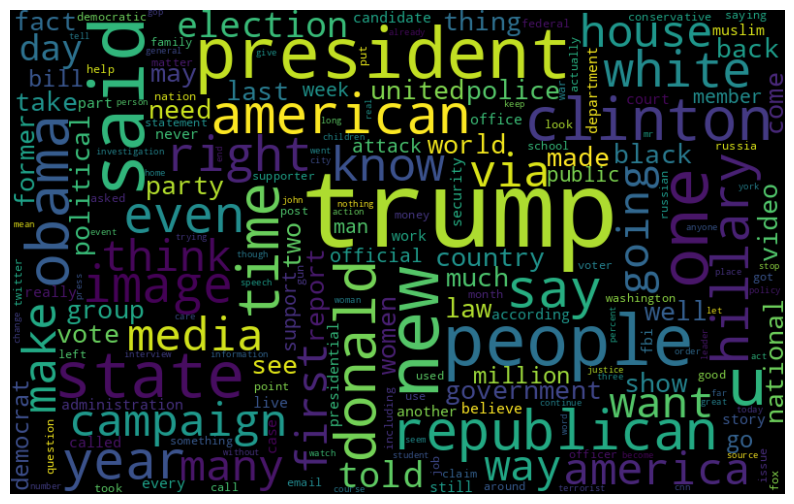

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height = 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

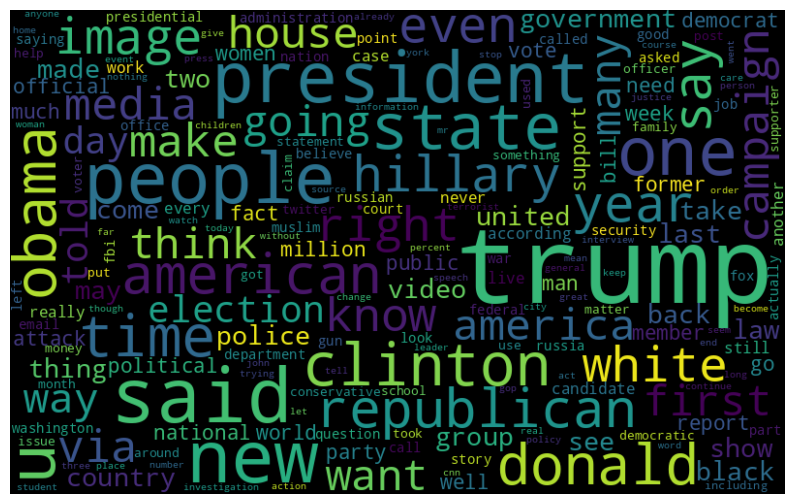

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width = 800, height = 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize = (12, 8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation = 'vertical')
    plt.show()

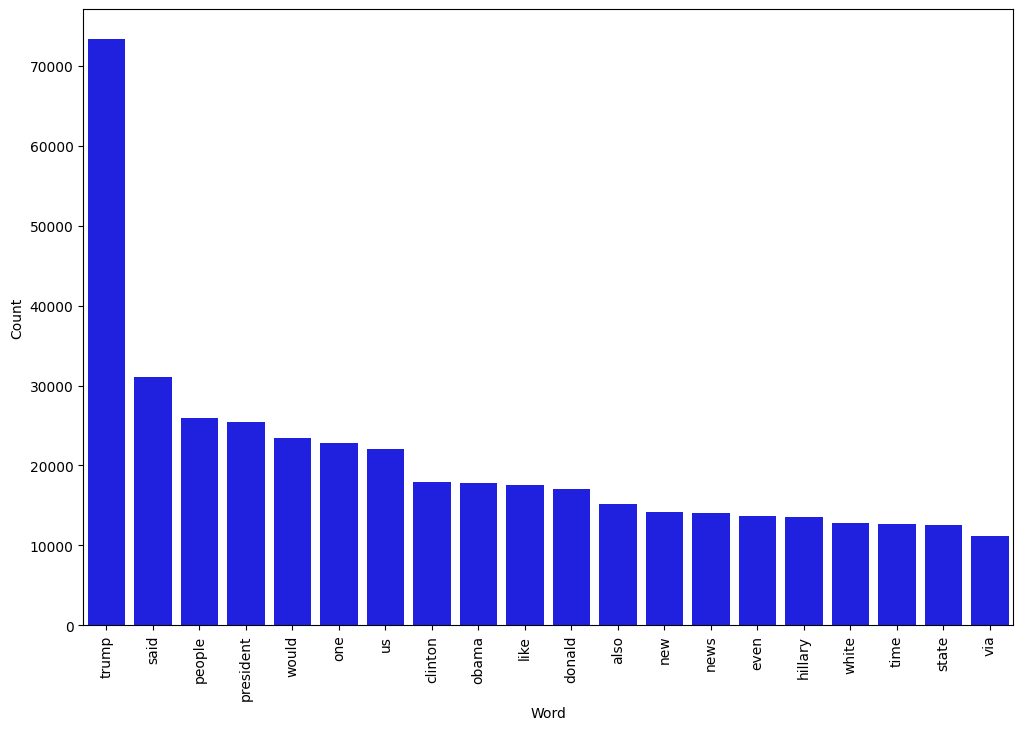

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

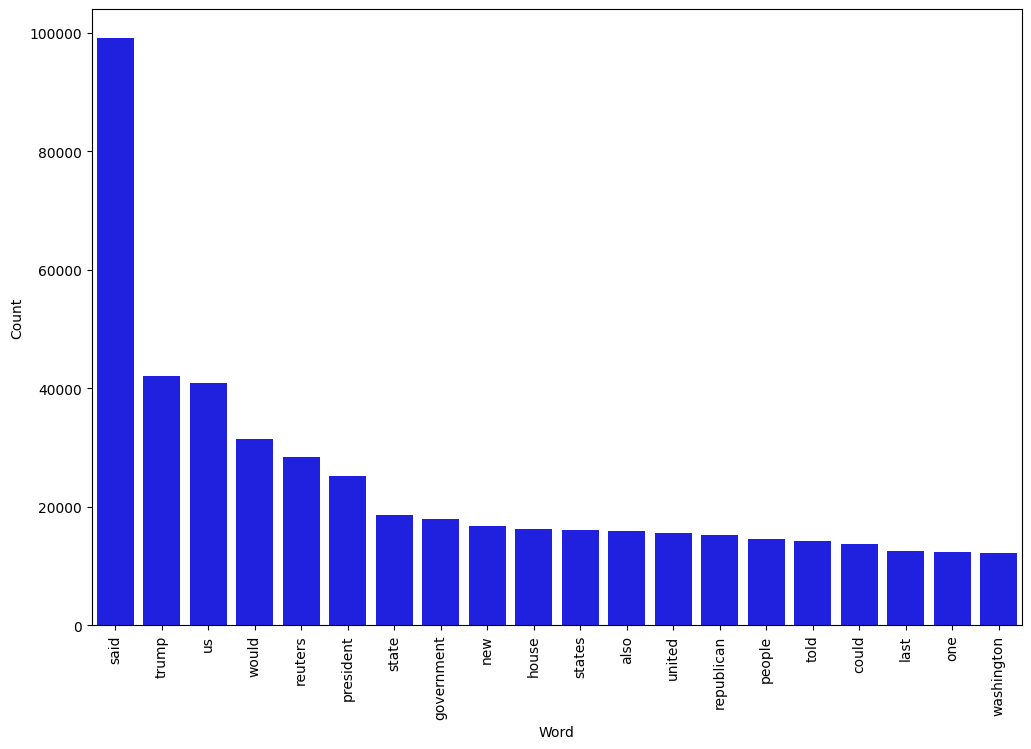

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

**Modeling**

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Preparing the data**

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data.target, test_size = 0.2, random_state = 42)

**Naive Bayes Regression**

In [ ]:
dct = dict()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 94.7%


Confusion matrix, without normalization


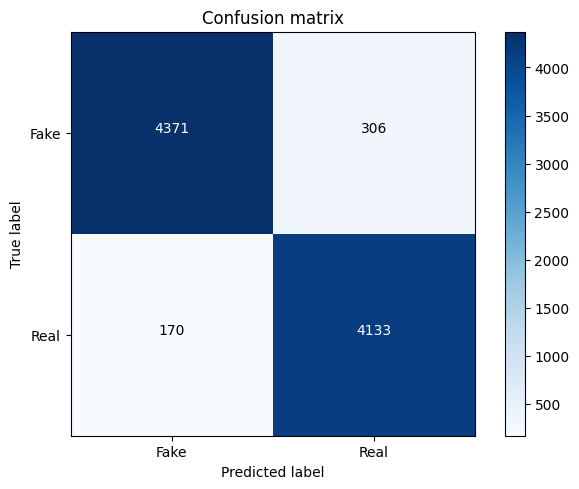

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Logistic Regression**

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy of the model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 98.82%


Confusion matrix, without normalization


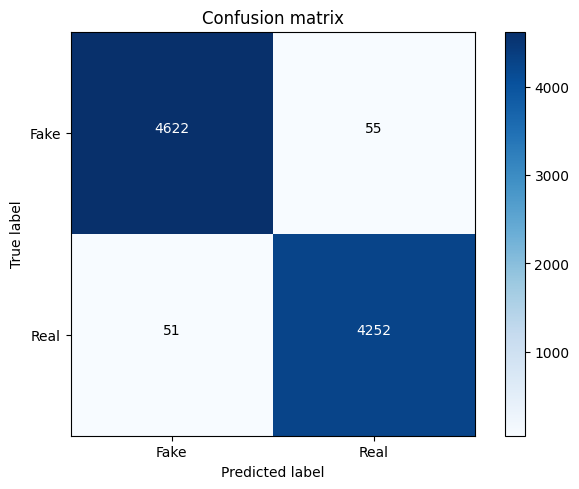

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy',
                                           max_depth = 20,
                                           splitter = 'best',
                                           random_state = 42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy of the model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.61%


Confusion matrix, without normalization


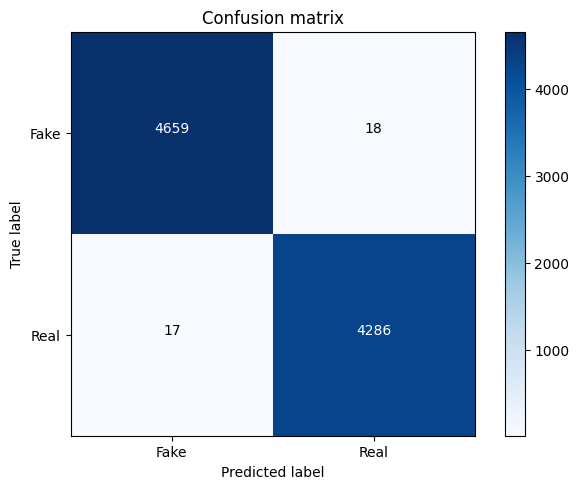

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators = 50, criterion = "entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.13%


Confusion matrix, without normalization


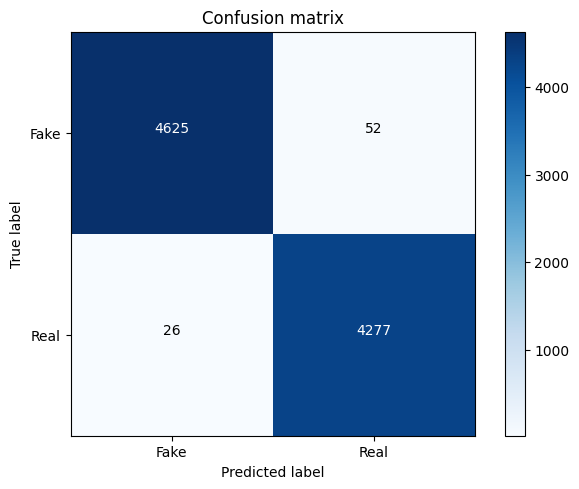

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**SVM Regression**

In [ ]:
from sklearn import svm

# Create an SVM classifier
# Linear Kernel
clf = svm.SVC(kernel = 'linear')

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.54%


Confusion matrix, without normalization


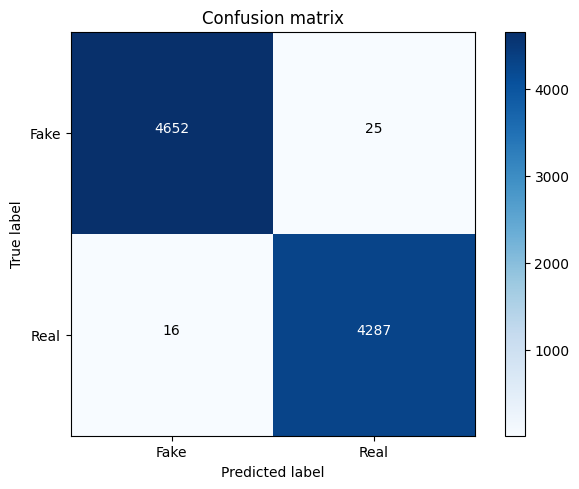

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Comparing Different Models**

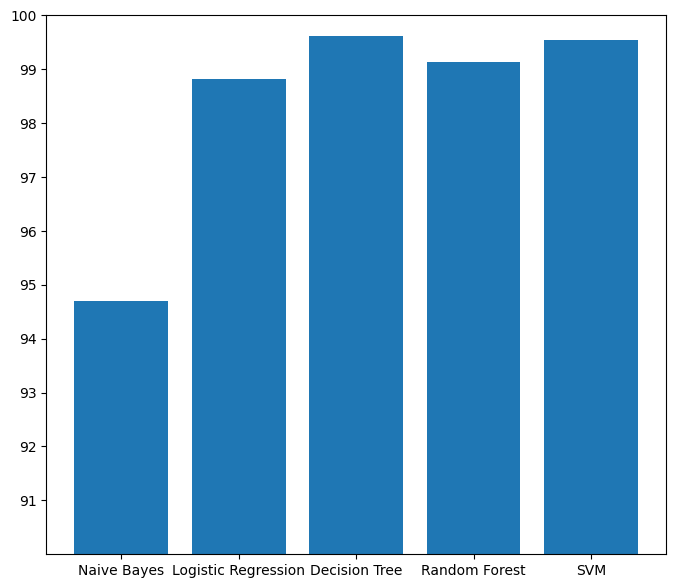

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.show()